<a href="https://colab.research.google.com/github/smohammadhejazi/recommendation-as-a-service/blob/main/colab/kmodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kmodes

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import time
from kmodes.kmodes import KModes

# Load Movielens 100k 

In [ ]:
# Load datasets
data_dir = 'data'
!mkdir $data_dir
!cd $data_dir && wget http://files.grouplens.org/datasets/movielens/ml-100k.zip
!cd $data_dir && unzip ml-100k.zip

--2022-04-24 21:09:18--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  20.5MB/s    in 0.2s    

2022-04-24 21:09:18 (20.5 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]

Archive:  ml-100k.zip
   creating: ml-100k/
  inflating: ml-100k/allbut.pl       
  inflating: ml-100k/mku.sh          
  inflating: ml-100k/README          
  inflating: ml-100k/u.data          
  inflating: ml-100k/u.genre         
  inflating: ml-100k/u.info          
  inflating: ml-100k/u.item          
  inflating: ml-100k/u.occupation    
  inflating: ml-100k/u.user          
  inflating: ml-100k/u1.base         
  inflating: ml-100k/u1.test         
  inflating: ml-100k/u2.base

In [ ]:
!ls $data_dir/ml-100k

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [ ]:
col_names=['user_id', 'item_id', 'rating', 'timestamp'] 
ratings = pd.read_csv(data_dir + '/ml-100k/u.data', sep='\t', names=col_names)
col_names=['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv(data_dir + '/ml-100k/u.user', sep='|', names=col_names)

In [ ]:
users.head(5)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
users_clean = users.drop(columns='zip_code')

In [ ]:
users_clean.head(5)

,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


# K Modes on users

## Training

In [ ]:
cost = []
fit_time = []
k_clusters = range(1,120)
for k in k_clusters:
  print('*** ' + str(k) + ' Clusters ***')
  kmode = KModes(n_clusters=k, init="random", n_init=5, verbose=1)
  start = time.perf_counter()
  kmode.fit_predict(users)
  end = time.perf_counter()
  cost.append(kmode.cost_)
  fit_time.append(end - start)


*** 1 Clusters ***
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 3800.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 3800.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 3800.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 3800.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 3800.0
Best run was number 1
*** 2 Clusters ***
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 3679.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 13, cost: 3663.0
Init: initializing centroids
Init: initiali

In [ ]:
cost_2 = []
fit_time_2 = []
k_clusters_2 = range(1,120)
for k in k_clusters_2:
  print('*** ' + str(k) + ' Clusters ***')
  kmode = KModes(n_clusters=k, init="random", n_init=5, verbose=1)
  start = time.perf_counter()
  kmode.fit_predict(users_clean)
  end = time.perf_counter()
  cost_2.append(kmode.cost_)
  fit_time_2.append(end - start)


*** 1 Clusters ***
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2866.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2866.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2866.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 2866.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 2866.0
Best run was number 1
*** 2 Clusters ***
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 29, cost: 2603.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 44, cost: 2593.0
Run 2, iteration: 2/100, moves: 0, cost: 2

In [ ]:
cost_3 = []
fit_time_3 = []
k_clusters_3 = range(20,40)
for k in k_clusters_3:
  print('*** ' + str(k) + ' Clusters ***')
  kmode = KModes(n_clusters=k, init="random", n_init=5, verbose=1)
  start = time.process_time()
  kmode.fit_predict(users_clean)
  end = time.process_time()
  cost_3.append(kmode.cost_)
  fit_time_3.append(end - start)


*** 20 Clusters ***
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 103, cost: 1940.0
Run 1, iteration: 2/100, moves: 7, cost: 1940.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 86, cost: 2074.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 127, cost: 1976.0
Run 3, iteration: 2/100, moves: 82, cost: 1975.0
Run 3, iteration: 3/100, moves: 0, cost: 1975.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 259, cost: 1988.0
Run 4, iteration: 2/100, moves: 14, cost: 1988.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 167, cost: 2144.0
Run 5, iteration: 2/100, moves: 3, cost: 2144.0
Best run was number 1
*** 21 Clusters ***
Init: initializing centroids
Init: initializing

## Using elbow method to find best number of clusters

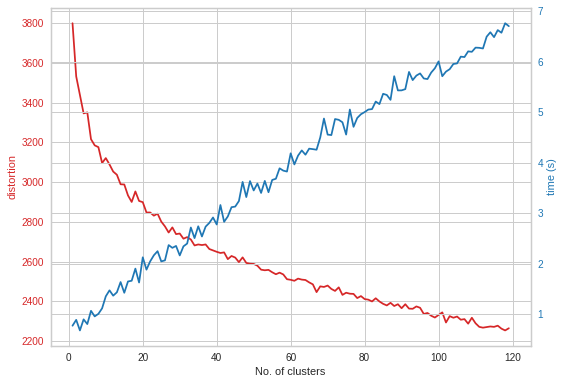

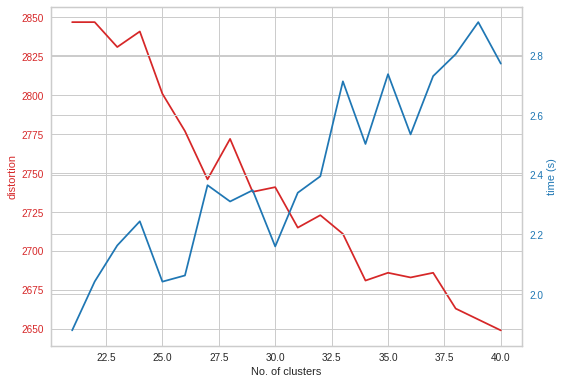

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('No. of clusters')
ax1.set_ylabel('distortion', color=color)
ax1.plot(k_clusters, cost, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('time (s)', color=color)  
ax2.plot(k_clusters, fit_time, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('No. of clusters')
ax1.set_ylabel('distortion', color=color)
ax1.plot(k_clusters[20:40], cost[20:40], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('time (s)', color=color)  
ax2.plot(k_clusters[20:40], fit_time[20:40], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

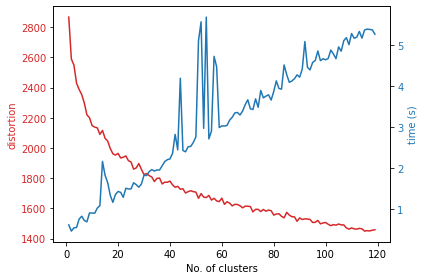

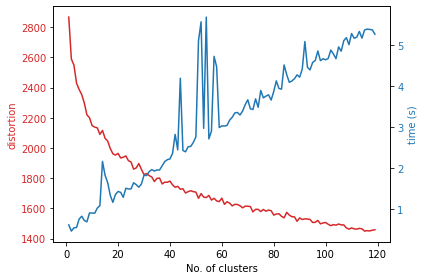

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('No. of clusters')
ax1.set_ylabel('distortion', color=color)
ax1.plot(k_clusters_2, cost_2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('time (s)', color=color)  
ax2.plot(k_clusters_2, fit_time_2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('No. of clusters')
ax1.set_ylabel('distortion', color=color)
ax1.plot(k_clusters_2[20:40], cost_2[20:40], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('time (s)', color=color)  
ax2.plot(k_clusters_2[20:40], fit_time_2[20:40], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

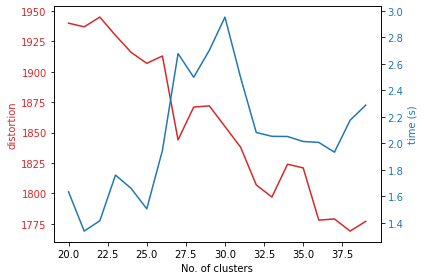

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('No. of clusters')
ax1.set_ylabel('distortion', color=color)
ax1.plot(k_clusters_3, cost_3, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('time (s)', color=color)  
ax2.plot(k_clusters_3, fit_time_3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

## Clustring with k = 30

In [ ]:
kmode = KModes(n_clusters=30, init="random", n_init=5, verbose=1)
clusters = kmode.fit_predict(users)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 154, cost: 2771.0
Run 1, iteration: 2/100, moves: 2, cost: 2771.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 172, cost: 2788.0
Run 2, iteration: 2/100, moves: 84, cost: 2787.0
Run 2, iteration: 3/100, moves: 0, cost: 2787.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 172, cost: 2774.0
Run 3, iteration: 2/100, moves: 3, cost: 2774.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 118, cost: 2728.0
Run 4, iteration: 2/100, moves: 1, cost: 2728.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 100, cost: 2717.0
Run 5, iteration: 2/100, moves: 2, cost: 2717.0
Best run was number 5


In [ ]:
clustered_users = pd.DataFrame.copy(users)
clustered_users.insert(0, "cluster", clusters, True)

In [ ]:
clustered_users.head(5)

,cluster,user_id,age,gender,occupation,zip_code
0,6,1,24,M,technician,85711
1,13,2,53,F,other,94043
2,20,3,23,M,writer,32067
3,6,4,24,M,technician,43537
4,13,5,33,F,other,15213
